In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [3]:
# Hyper parameter
BATCH_SIZE = 100
EPOCH = 20
LR = 1e-3

In [4]:
transform = transforms.ToTensor()

train_DS = datasets.MNIST(  # DS = DataSet의 약자
    root='/content/drive/MyDrive/DeepLearning/data',
    train=True,
    download=True,
    transform=transform
)
test_DS = datasets.MNIST(
    root='/content/drive/MyDrive/DeepLearning/data',
    train=False,
    download=True,
    transform=transform
)

train_DL = DataLoader(  # DL = DataLoader의 약자
    train_DS,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_DL = DataLoader(
    test_DS,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [5]:
print(train_DS.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


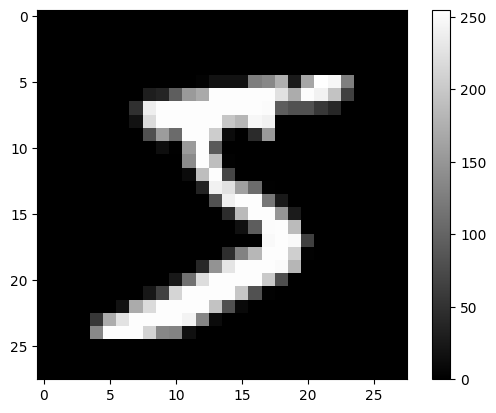

tensor(5)
torch.Size([28, 28])


In [6]:
plt.imshow(train_DS.data[0], cmap='gray')
plt.colorbar()
plt.show()
print(train_DS.targets[0])
print(train_DS.data[0].shape)  # 28x28

In [7]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Sequential(nn.Conv2d(1,8,3, padding=1),
                                   nn. BatchNorm2d(8),  # output에 맞추기
                                   nn.ReLU())
        self.Maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Sequential(nn.Conv2d(8,16,3, padding=1),
                                   nn. BatchNorm2d(16),
                                   nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Sequential(nn.Conv2d(16,32,3, padding=1),
                                   nn. BatchNorm2d(32),
                                   nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(2)
        self.fc = nn.Linear(32*3*3, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.Maxpool1(x)
        x = self.conv2(x)
        x = self.Maxpool2(x)
        x = self.conv3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
        return x

In [8]:
# x = torch.randn(100,1,28,28)
model = ConvNet().to(DEVICE)
print(model)

ConvNet(
  (conv1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (Maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (Maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (Maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=288, out_features=10, bias=True)
)


In [9]:
import os
os.chdir('/content/drive/MyDrive/DeepLearning')

In [10]:
from functions import *

Epoch: 1, train loss: 0.224
--------------------
Epoch: 2, train loss: 0.058
--------------------
Epoch: 3, train loss: 0.041
--------------------
Epoch: 4, train loss: 0.034
--------------------
Epoch: 5, train loss: 0.029
--------------------
Epoch: 6, train loss: 0.024
--------------------
Epoch: 7, train loss: 0.022
--------------------
Epoch: 8, train loss: 0.019
--------------------
Epoch: 9, train loss: 0.016
--------------------
Epoch: 10, train loss: 0.015
--------------------
Epoch: 11, train loss: 0.014
--------------------
Epoch: 12, train loss: 0.011
--------------------
Epoch: 13, train loss: 0.01
--------------------
Epoch: 14, train loss: 0.01
--------------------
Epoch: 15, train loss: 0.008
--------------------
Epoch: 16, train loss: 0.008
--------------------
Epoch: 17, train loss: 0.007
--------------------
Epoch: 18, train loss: 0.007
--------------------
Epoch: 19, train loss: 0.006
--------------------
Epoch: 20, train loss: 0.006
--------------------


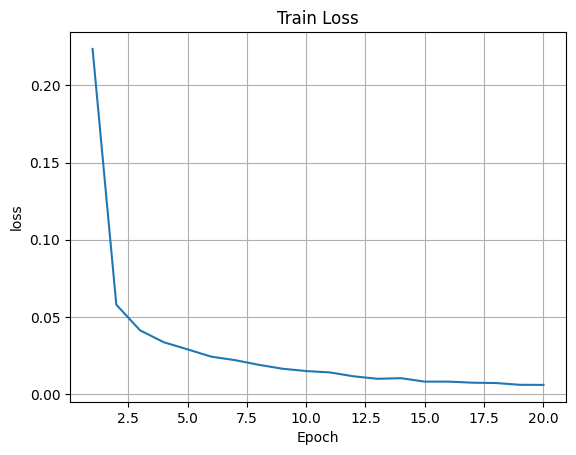

In [11]:
model.train()

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss()

loss_history = Train(model, train_DL, criterion, optimizer, EPOCH, DEVICE)

save_model_path = '/content/drive/MyDrive/Colab Notebooks/result/CNN_MNIST.pt'
torch.save(model, save_model_path)

plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train Loss')
plt.grid()

In [12]:
load_model = torch.load(save_model_path, map_location=DEVICE)

In [13]:
Test(load_model, test_DL, DEVICE)
# print(count_params(load_model))

Test accuracy: 9882/10000 (98.8 %)


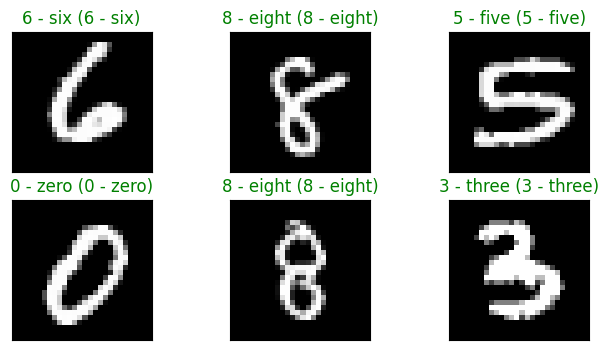

In [18]:
Test_plot(load_model, test_DL, DEVICE)